Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Capture the Flag Toy Example - Interactive (Human player)

This is a blank instantiaion of the Capture The Flag network to be played interactively by a human player (not via the gym envrionment).
The interface exposed to the attacker is given by the following commands:
    - c2.print_all_attacks()
    - c2.run_attack(node, attack_id)
    - c2.run_remote_attack(source_node, target_node, attack_id)
    - c2.connect_and_infect(source_node, target_node, port_name, credential_id)

In [1]:
import sys, logging
import cyberbattle.simulation.model as model
import cyberbattle.simulation.commandcontrol as commandcontrol
import cyberbattle.samples.toyctf.toy_ctf as ctf
import plotly.offline as plo

plo.init_notebook_mode(connected=True)
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)s: %(message)s")
%matplotlib inline 

In [2]:
network = model.create_network(ctf.nodes)
env = model.Environment(network=network, vulnerability_library=dict([]), identifiers=ctf.ENV_IDENTIFIERS)
env

Environment(network=<networkx.classes.digraph.DiGraph object at 0x7f6fcc50da90>, vulnerability_library={}, identifiers=Identifiers(properties=['CTFFLAG:LeakedCustomerData', 'CTFFLAG:LeakedCustomerData2', 'CTFFLAG:Readme.txt-Discover secret data', 'CTFFLAG:VMPRIVATEINFO', 'GitHub', 'MySql', 'SasUrlInCommit', 'SharepointLeakingPassword', 'Ubuntu', 'nginx/1.10.3'], ports=['GIT', 'HTTPS', 'MySQL', 'PING', 'SSH', 'SSH-key', 'su'], local_vulnerabilities=['CredScan-HomeDirectory', 'CredScanBashHistory', 'SearchEdgeHistory'], remote_vulnerabilities=['AccessDataWithSASToken', 'CredScanGitHistory', 'ListAzureResources', 'NavigateWebDirectory', 'NavigateWebDirectoryFurther', 'ScanPageContent', 'ScanPageSource', 'ScanSharepointParentDirectory']), creationTime=datetime.datetime(2024, 8, 5, 18, 48, 26, 229090), lastModified=datetime.datetime(2024, 8, 5, 18, 48, 26, 229093), version='0.1.0')

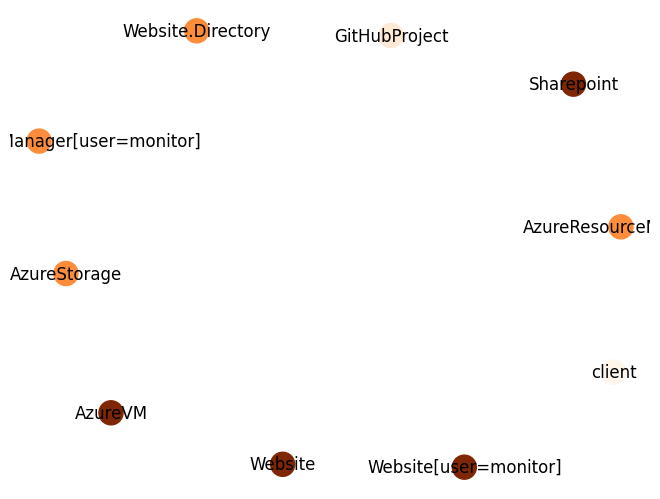

In [3]:
env.plot_environment_graph()

In [4]:
c2 = commandcontrol.CommandControl(env)
dbg = commandcontrol.EnvironmentDebugging(c2)


def plot():
    dbg.plot_discovered_network()
    c2.print_all_attacks()


plot()

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
